In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from glob import glob

In [16]:
def read_xy(path: str):
    df = pd.read_csv(path)
    df['N'] = df.index + 1
    df['r'] = (df.x ** 2 + df.y ** 2) ** 0.5
    df['cr'] = df.r.cummax()
    df['fd'] = np.log(df.N) / np.log(df.cr)

    return df

In [17]:
def read_all(load_dir: str):
    paths = glob(f'{load_dir}/*.csv')
    return [read_xy(path) for path in paths]

In [24]:
a = read_xy("/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/minimal-viable-alteration/1-1000.csv")
a

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


x   y     N          r         cr        fd
0     0   0     1   0.000000   0.000000 -0.000000
1    -1   0     2   1.000000   1.000000       inf
2    -2   0     3   2.000000   2.000000  1.584963
3     1   0     4   1.000000   2.000000  2.000000
4    -3   0     5   3.000000   3.000000  1.464974
..   ..  ..   ...        ...        ...       ...
995 -18  -4   996  18.439089  54.120237  1.729739
996 -47 -19   997  50.695167  54.120237  1.729990
997  -3  20   998  20.223748  54.120237  1.730241
998 -40  14   999  42.379240  54.120237  1.730492
999  35  -3  1000  35.128336  54.120237  1.730743

[1000 rows x 6 columns]

In [48]:
dfs = read_all('/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/minimal-viable-alteration')

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshu

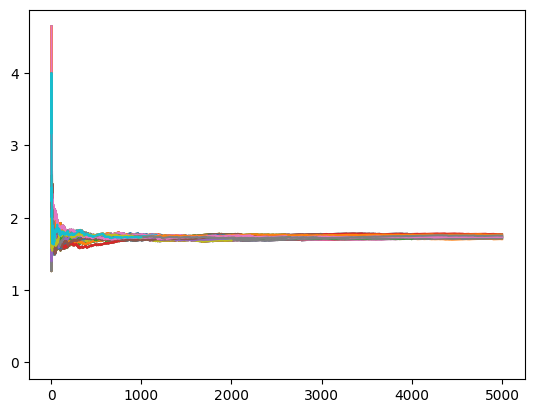

In [49]:
for df in dfs:
    plt.plot(df.N, df.fd)

plt.show()

In [44]:
def convergent_tail_index(series, tol):
    diffs = np.abs(np.ediff1d(a.fd))
    for i in range(0, len(diffs)):
        if np.max(diffs[i:]) <= tol:
            return i

    # No convergence found
    return None

In [45]:
def compute_fd(df):
    tail_index = convergent_tail_index(df.fd, 0.05)
    return np.mean(a.fd[tail_index:])

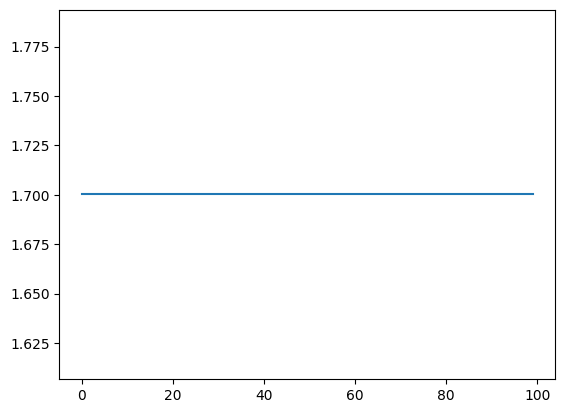

In [52]:
plt.plot([compute_fd(df) for df in dfs])

Interesting that this produces the same value, I suppose we have convergence to the accuracy of a double?